<a href="https://colab.research.google.com/github/minhphan03/AMATH-301-Python-Notebooks/blob/main/data_fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
import pandas as pd

## Polyfit and polyval
The procedure we just outlined for finding a best fit line is so common that python has a predefined command for it.  Instead of finding the derivatives of $\mathcal{E}$ and setting them to zero, then creating the corresponding linear system and solving it with `solve`, you can just use the numpy function `polyfit`.  This command takes three inputs: An array of $x$ data, an array of $y$ data and a degree.  The $x$ and $y$ arrays are just our original data set.  We will talk more about the degree in the next lecture, but to find a best fit line we should just use 1 for the order.  We can therefore try 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Week6_data1.csv to Week6_data1 (1).csv


In [ ]:
df1 = pd.read_csv('Week6_data1.csv')

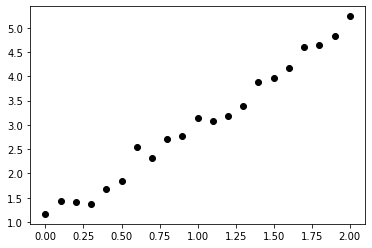

In [ ]:
data = np.genfromtxt('Week6_data1.csv', delimiter=',')
x = data[0, :]
y = data[1, :]
plt.plot(x, y, 'ko')

In [ ]:
coeffs = np.polyfit(x, y, 1)
print(coeffs)

[2.01506007 1.00376907]


This gives us exactly the same values as before, albeit in a 1D array instead of a column vector.  

If we want to graph this best fit line, we can take advantage of another useful numpy function called `polyval`.  This function takes the coefficients of a polynomial (remember, a line is a 1st degree polynomial) and a 1D array of $x$ values and then returns a corresponding array of $y$ values.  We could therefore plot this line with the following code: 

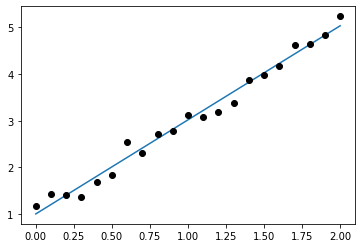

In [ ]:
xplot = np.linspace(0, 2, 1000)
yplot = np.polyval(coeffs, xplot)
plt.plot(xplot, yplot, x, y, 'ko')

The `polyval` function saves a little bit of typing here and also means that you don't have to remember which order the coefficients from `polyfit` come in.  The `polyval` function also significantly reduces rounding error when plugging values into higher order polynomials, so it is *always* better to use `polyval` than to type out the equation `coeffs[0] * xplot + coeffs[1]` directly.  

# Nonlinear Curve Fitting
In the last lecture, we talked about how to find the best fit line through a set of data points, either by hand or with the numpy function `polyfit`.  The process that we outlined there can easily be extended to other formulas.  In general, if you have a formula $y = f(x)$ that you think fits your data, the RMS error for this fit is defined as 

$E = \sqrt{\frac{1}{n}\displaystyle\sum_{k=1}^{n}(f(x_k) - y_k)^2}$.  

If $f$ has parameters (such as the $m$ and $b$ from our linear equation) then we can minimize $E$ by taking its derivative with respect to each parameter and setting them equal to zero.  

Unfortunately, the resulting system of equations is not usually linear and will often be impossible to solve by hand.  It turns out that if $f$ is an $n$th degree polynomial (such as $f(x) = ax^2 + bx + c$ or $f(x) = ax^3 + bx^2 + cx + d$) then we get an $(n+1)\times (n+1)$ linear system of equations, which we could solve with `scipy.optimize.solve` just like before.  For most other functions $f$, the resulting system will be nonlinear and we will have to resort to some other method.  This means that we will almost always resort to python functions to find best fit curves.  For some special types of best fit functions, there are pre-defined python functions that will find best fit curves for us.  For other curves, we can use `scipy.optimize.minimize` to minimize the RMS error directly.  In any case, the curve we find that minimizes the RMS error will be called the *best fit curve* for our data set.  Remember that our definition of "best" depends both on the choice of error function (we will always choose RMS error unless I specify otherwise, but other versions are possible) and on the choice of function.  That is, the best fit line and the best fit quadratic are not really being measured on the same scale.  We will talk more about the ramifications of this issue in the next section.  

## Higher order polynomial fits and overfitting
The `polyfit` function doesn't just find linear fits.  It can actually compute the best fit polynomial of any order.  For example, we could find the best fit parabola (i.e., the best fit curve of the form $f(x) = ax^2 + bx + c$) of the data from last lecture with the code 

In [ ]:
x = data[0, :]
y = data[1, :]
coeffs2 = np.polyfit(x, y, 2)
print(coeffs2)

[0.19568272 1.62369463 1.12770146]


The numbers in `coeffs2` are the coefficients $a$, $b$ and $c$ that give the smallest root-mean-square error with our data set.  We can plot this to see if it gives a reasonable fit: 

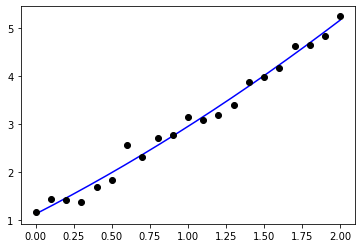

In [ ]:
xplot = np.linspace(0, 2, 1000)
yplot = np.polyval(coeffs2, xplot)
plt.plot(xplot, yplot, 'b', x, y, 'ko')

It appears to be slightly better than our best fit line from the last lecture, but it is difficult to say for sure.  We could try finding the RMS error to compare: 

In [ ]:
yhat = np.polyval(coeffs2, x)
n = x.size
E2 = np.sqrt((1 / n) * np.sum((yhat - y) ** 2))
print(E2)

0.146793952533115


We got a value of approximately $0.1468$, which is smaller than the error we got from our line.  In some sense, this means that the quadratic fits our data better than the line.  However, one should view this "improvement" with some trepidation.  The problem is that increasing the order *automatically* decreases our error.  To see why, imagine what would happen if our line were already the best possible fit.  That is, suppose that no other curve could possibly come closer to our data points than the best fit line we already found.  In that case, we could just choose the quadratic $y = 0x^2 + mx + b$ and it would be just as good as our line.  If the line were anything less than perfect then we could choose some (potentially very small) $a$ in order to improve the fit.  This is a problem.  

To see why this is bad, you need to know how I came up with the original $\mathbf{x}$ and $\mathbf{y}$.  I used the formula $y_k = 2x_k + 1 + \epsilon$, where $\epsilon$ was a small random number.  (In particular, I used normally distributed random numbers with standard deviation $0.16$.)  Suppose that I generated one more data point at $x = 5$.  

In [ ]:
x_new = 5
y_new = 2 * x_new + 1 + 0.16 * np.random.randn(1)

Let's add this new point to our plot and see which best fit curve most accurately predicted it.  (I reproduced the coefficients for our best fit line in `coeffs`, and `coeffs2` holds the coefficients for our best fit quadratic.)

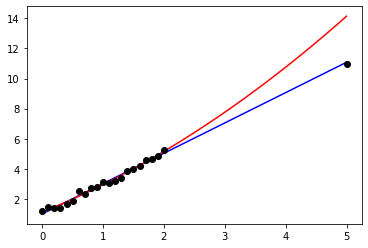

In [ ]:
xplot = np.linspace(0, 5, 1000)
plt.plot(xplot, np.polyval(coeffs, xplot), 'b', xplot, np.polyval(coeffs2, xplot), 'r', x, y, 'ko', x_new, y_new, 'ko')

Because the new point is random, you will see a different final point every time you run this code, but it will essentially always be much closer to the line (in blue) than to the quadratic (in red).  Since our data really did come from a line ($y = 2x + 1 + \textrm{noise}$), any curve with an $x^2$ term will be worse than the original at predicting new data points.  In essence, the $x^2$ term is capturing patterns in the noise from the original data set that don't really matter, not telling us something important about our data.  Using a higher order polynomial like this (or using any curve with too many parameters in it) is called *overfitting*.  The main problem with overfitting is that your curve will be worse at predicting new data, even though it matches the existing data better.  That is, if I make a new data point using the same formula as I did originally (or measure a new data point using the same measurement process) then it is likely to be very close to the original best fit line, but there is no reason to hope that it is close to the overfitted curve.  

## Extreme overfitting
We can carry this idea of overfitting to an extreme.  Notice that our original data set has 21 data points.  Likewise, a 20th order polynomial has 21 coefficients.  This means that we can find a 20th order polynomial that *perfectly* fits our data set.  (We will just use the `polyfit` function, but the optional videos show a slicker method called "Lagrange polynomials".)  

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


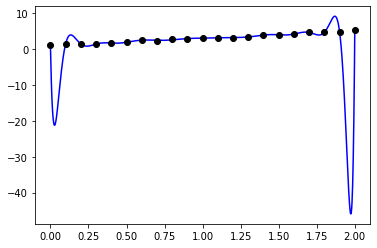

In [ ]:
coeffs = np.polyfit(x, y, 20)
xplot = np.linspace(0, 2, 1000)
yplot = np.polyval(coeffs, xplot)
plt.plot(xplot, yplot, 'b', x, y, 'ko')

What happened?  We hit every single data point, but this graph certainly doesn't describe any trends in our data.  The phenomenon where this best fit polynomial oscillates wildly is called "Runge's phenomenon", or the more whimsical "polynomial wiggle", and it means that we should essentially never use high order polynomial fits like this.  

There is actually another problem with high order fits, although it is hard to see with this data set.  High order polynomials naturally lead to serious rounding errors, which make any calculations involving these polynomials (including just graphing) highly unstable.  That is why python gives the warning "Polyfit may be poorly conditioned."  If you try this on a larger data set (such as the one in the next homework) you will see a dramatic example of rounding error in action.  The `polyval` command helps with this issue because it evaluates polynomials in a smarter order, but there is no way to completely eliminate the problem.  You should *always* use `polyval` to evaluate higher order polynomials.  

## Fitting nonlinear data
While it is true that overfitting is an important risk to keep in mind, and that the risk grows as we add more parameters to the curve we are fitting, it is also sometimes a good idea to try to fit a more complicated curve to our data.  As an example, consider the data in the file `Week6_data2.csv`.  

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Week6_data2.csv to Week6_data2 (2).csv


In [ ]:
df2 = pd.read_csv('Week6_data2.csv')

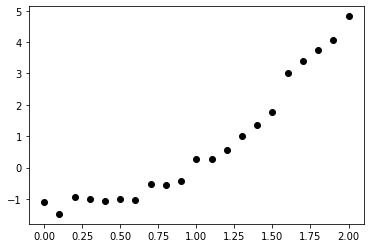

In [ ]:
data = np.genfromtxt('Week6_data2.csv', delimiter=',')
x = data[0, :]
y = data[1, :]
n = x.size
plt.plot(x, y, 'ko')

This data looks roughly linear, but there does seem to be a recognizable "curve" in the graph.  We could, of course, try to find a best fit line for this data set.  Using the same code as in the last lecture, we get the following plot: 

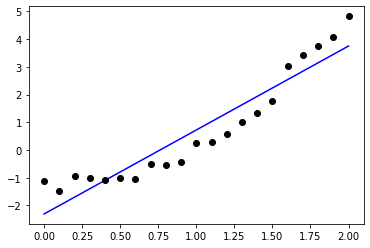

In [ ]:
coeffs = np.polyfit(x, y, 1)
xplot = np.linspace(0, 2, 1000)
yplot = np.polyval(coeffs, xplot)
plt.plot(xplot, yplot, 'b', x, y, 'ko')

This doesn't look like a terrible fit, but we do seem to be systematically off.  Our line is too low at the edges and too high in the middle.  We can quantify how "far off" our curve is with the root mean square error of this fit.  

In [ ]:
E = np.sqrt((1 / n) * np.sum((np.polyval(coeffs, x) - y) ** 2))
print(E)

0.6473205589982114


We don't really have anything useful to compare this error to yet, but it's worth noting that this is substantially larger than the linear fit from last lecture.  (Normally that is not relevant, but when I made the two data sets I used random numbers with the same standard deviation, which means that if our data really were linear we would expect roughly the same RMS error as before.)

Let's try a higher order polynomial fit.  

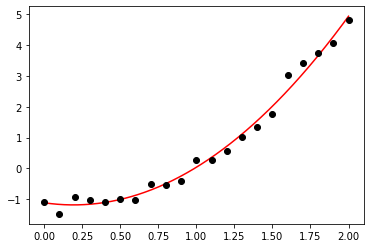

In [ ]:
coeffs2 = np.polyfit(x, y, 2)
yplot = np.polyval(coeffs2, xplot)
plt.plot(xplot, yplot, 'r', x, y, 'ko')

At least visually, this seems like a big improvement.  We can also check the RMS error to try to quantify how much better it is.  

In [ ]:
E = np.sqrt((1 / n) * np.sum((np.polyval(coeffs2, x) - y) ** 2))
print(E)

0.20680182519744578


Keep in mind that this error is *automatically* lower than the error for our best fit line, just because we added an extra paramter to our curve.  That said, this is a pretty substantial improvement.  The error for our best fit quadratic is less than a third of the error for our best fit line.  

What if we keep going?  If we got this much improvement out of a quadratic, what will happen if we try a cubic fit?

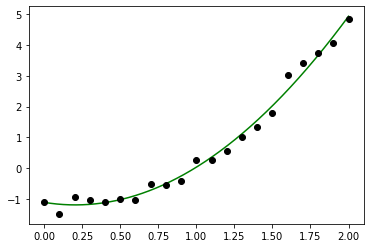

In [ ]:
coeffs3 = np.polyfit(x, y, 3)
yplot = np.polyval(coeffs3, xplot)
plt.plot(xplot, yplot, 'g', x, y, 'ko')

This does not look like nearly as much of an improvement as the quadratic.  Again, we can quantify the change by finding the RMS error for our new fit.  

In [ ]:
E = np.sqrt((1 / n) * np.sum((np.polyval(coeffs3, x) - y) ** 2))
print(E)

0.20671029701066426


Once again, the error is *automatically* lower because we used an extra parameter in our curve.  In this case, though, the error is only 0.1% lower instead of nearly 2/3 lower.  This tells us that going from a quadratic to a cubic was not a good idea.  

These results are no coincidence.  When I generated this data, I did so with the formula $y = 2x^2 - x - 1 + \epsilon$, where $\epsilon$ was a small random number.  This means that a best fit line can't possibly fully describe the process I used to make the data, but a best fit quadratic can.  Notice that the coefficients of our best fit quadratic are actually relatively close to correct.  Instead of $2$, $-1$ and $-1$, we got $1.9$, $-0.7$ and $-1.1$.  These are not as accurate as with the previous data set, when we predicted the coefficients of our best fit line to the first decimal place, but they are still reasonably close.  As a general rule, if your formula has more parameters, you need more data to accurately predict these parameters.  If we had 100 points in our data set instead of 21, then we would have obtained a much more accurate estimate of our formula.  

## Non-polynomial curves
So far, both of our data sets have really come from polynomials.  (The first set came from a linear function and the second came from a quadratic function.)  In general, we can't actually hope that all of our data will be in such a nice form.  As an example, consider the data in `Week6_data3.csv`.  

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Week6_data3.csv to Week6_data3 (2).csv


In [ ]:
df3 = pd.read_csv('Week6_data3.csv')

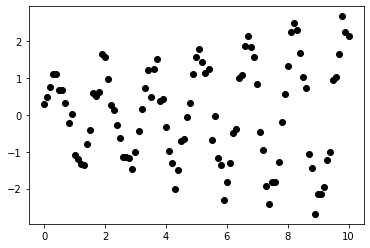

In [ ]:
data = np.genfromtxt('Week6_data3.csv', delimiter=',')
x = data[0, :]
y = data[1, :]
n = x.size
plt.plot(x, y, 'ko')

At first glance, this data might appear roughly linear.  It seems to be centered around the line $y = 0$ with quite a bit of noise.  If you squint at the data, though, you might see some more systematic patterns to it.  For one thing, the points appear to be getting more spread out as $x$ increases.  For another, it looks like there might be a regular oscillation instead of just noise.  That is, the points appear to rise and fall at regular intervals.  You should be wary of this sort of visual analysis, though.  You can always find more patterns if you squint at your data hard enough, but that doesn't mean there is a real underlying pattern.  

With all that said, it never hurts to start by finding a linear fit to our data set.  We get the following line and RMS error: 

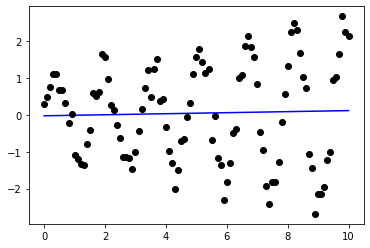

In [ ]:
coeffs = np.polyfit(x, y, 1)
xplot = np.linspace(0, 10, 1000)
yplot = np.polyval(coeffs, xplot)
plt.plot(xplot, yplot, 'b', x, y, 'ko')

In [ ]:
E = np.sqrt((1 / n) * np.sum((np.polyval(coeffs, x) - y) ** 2))
print(E)

1.319402103674205


This line doesn't look like a particularly good fit, but it is possible that these data really are just random numbers, in which case there is nothing more we can do.  The error value doesn't tell us very much because we don't have any other drrors to compare to.  

We could do the same thing as before and try higher order polynomial fits to see if they do any better.  There is a plausible (but entirely wrong) argument for why this might be a good idea: If our data was generated by the formula $y = f(x) + \epsilon$ for some reasonably nice function $f$, then the function $f(x)$ should have a Taylor expansion.  Maybe if we found high order polynomial fits to our data, they would give us a good approximation to the Taylor expansion of $f(x)$, and therefore a good approximation to $f(x)$ itself.  We know that it is a bad idea to use *too high* an order for our fit, but maybe we could safely use a medium order polynomial.  It turns out that this is just not how data fitting really works.  There are two different issues: First, Taylor approximations rely on a lot of detailed information (higher order derivatives) about $f(x)$ very close to one point, while we have lots of data about $f$ at widely spread out points.  Second, small errors in our data (and, in practice, all data has small errors) lead to huge changes in these higher order polynomial fits, even if the data is still generated from the same function $f(x)$.  As an illustrative example, though, let's try this out: 

##Rahman notes: 
The notes that were passed down show some pitfalls that we should be aware of, and some naive fixes, but I think it might be interesting to be a bit clever about this.  So this might be a bit complex, but I think it will pay dividends if anyone goes into any sort of data-related field.
We see that the data seems to look like a sinusoidal with an exponential profile.  Let's first tackle the sinusoidal.  How do we figure out the period?  One way is to look at the troughs.  The distance between troughs will give us the period.  We did something similar last week.

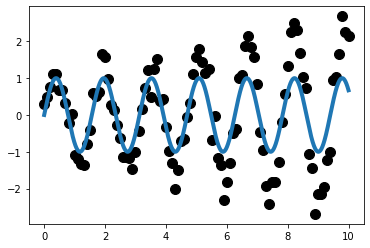

In [ ]:
count = 0
j = 0
for i in range(len(x)-1):
  if (np.sign(y[i]) != np.sign(y[i+1])) and (np.abs(x[j]-x[i]) > 0.5):
                              count = count + 1
                              j = i

x_sin = np.arange(x[0], x[-1]+0.0001, 0.001)
y_sin = np.sin(x_sin*np.pi*count/(x[j]-x[0]))
plt.plot(x, y, 'ko', x_sin, y_sin, linewidth = 4, markersize = 10)

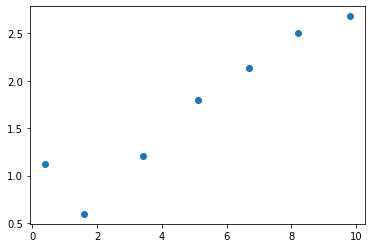

In [ ]:
x_peaks = np.zeros(int(count/2 + 1))
y_peaks = x_peaks.copy()
count = 0
for i in range(len(x)-2):
  if y[i] < y[i+1] and y[i+2] < y[i+1] and np.abs(x[j]-x[i]) > 0.5 and y[i+1] > 0:
    count = count + 1
    y_peaks[count-1] = y[i+1]
    x_peaks[count-1] = x[i+1]
    j=i

plt.plot(x_peaks, y_peaks, 'o', linewidth = 4)

In [ ]:
coeffs = np.polyfit(x_peaks, np.log(y_peaks), 1)
print(coeffs)

[ 0.13832909 -0.2616678 ]


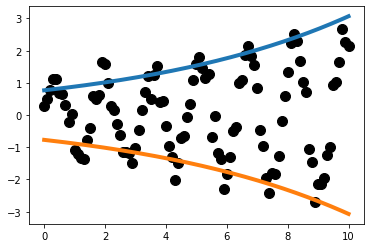

In [ ]:
x_envelope = np.arange(x[0], x[-1]+0.00001, 0.001)
y_envelope = np.exp(coeffs[0]*x_envelope + coeffs[1])
plt.plot(x, y, 'ko', x_envelope, y_envelope, x_envelope, -y_envelope, linewidth = 4, markersize = 10)

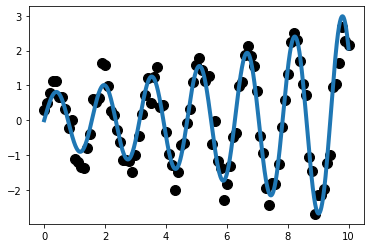

In [ ]:
plt.plot(x, y, 'ko', x_envelope, y_envelope*y_sin, linewidth = 4, markersize = 10)

##Older notes:

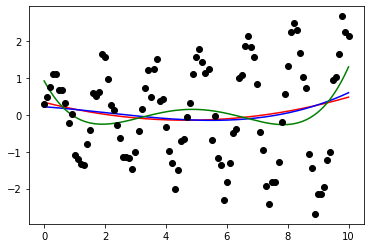

In [ ]:
coeffs2 = np.polyfit(x, y, 2)
coeffs3 = np.polyfit(x, y, 3)
coeffs4 = np.polyfit(x, y, 4)
yplot2 = np.polyval(coeffs2, xplot)
yplot3 = np.polyval(coeffs3, xplot)
yplot4 = np.polyval(coeffs4, xplot)

plt.plot(xplot, yplot2, 'r', xplot, yplot3, 'b', xplot, yplot4, 'g', x, y, 'ko')

As you can see, these do not appear to match the data very well.  Maybe we didn't go high enough?  

/home/lowell/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


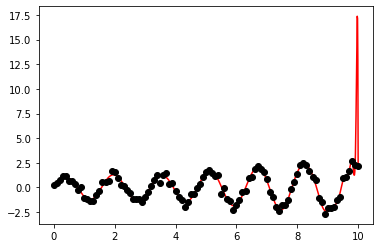

In [ ]:
coeffs90 = np.polyfit(x, y, 90)
yplot90 = np.polyval(coeffs50, xplot)
plt.plot(xplot, yplot90, 'r', x, y, 'ko')

This is a good illustration of the problems with high order polynomial fits.  You may be able to find a medium order polynomial that appears to be a good fit to the data (in this case, a 20th order polynomial does not look bad at all) but it is entirely by coincidence.  The data did not come from a polynomial formula, and we are not really approximating the real formula well with our polynomial fits.  In general, this idea of trying higher and higher order polynomials simply doesn't work.  

If polynomial fits won't work, then what are we supposed to do?  It turns out that there is a way to proceed, but we need more information.  In particular, we need to know more about the formula we got our data from.  In this case, I made the data myself, so I know that it came from the formula $y = e^{ax}\sin(bx) + \epsilon$, where $\epsilon$ was a small random number.  This is not a polynomial, but it is a formula with relatively few parameters.  That means that we can try to find a best fit curve of the appropriate form.  Unfortunately, python does not have a builtin function "exponential_sine_fit", so we will need to do a little more work than in the case of polynomials.  

To start, let's just try a couple examples for $a$ and $b$.  

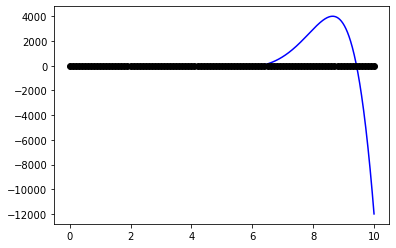

In [ ]:
a = 1
b = 1
yplot = np.exp(a * xplot) * np.sin(b * xplot)
plt.plot(xplot, yplot, 'b', x, y, 'ko')

This is obviously not a very good fit.  We can quantify just how bad it is with the RMS error: 

In [ ]:
E = np.sqrt((1 / n) * np.sum((np.exp(a * x) * np.sin(b * x) - y) ** 2))
print(E)

2202.171475558139


The problem is that $a = 1$ and $b = 1$ was not a very good guess.  Let's try again.  

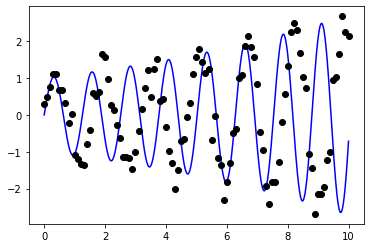

In [ ]:
a = 0.1
b = 5
yplot = np.exp(a * xplot) * np.sin(b * xplot)
plt.plot(xplot, yplot, 'b', x, y, 'ko')

This certainly looks better, and we can quantify just how much better with the RMS error.  

In [ ]:
E = np.sqrt((1 / n) * np.sum((np.exp(a * x) * np.sin(b * x) - y) ** 2))
print(E)

1.9406183256452776


It looks like this approach could work quite well, but we don't just want to keep guessing and checking.  Instead, we want a systematic way to find the *best* fit.  At least in principle, we already know how to do this.  Remember that the only things we are actually allowed to change in this problem are $a$ and $b$, so our formula for the RMS error is really a function of $a$ and $b$: 

$E(a, b) = \sqrt{\frac{1}{n}\displaystyle\sum_{k=1}^{n}\left(e^{ax_k}\sin(bx_k) - y_k\right)^2}$.  

In python, this is 

In [ ]:
RMS_Error = lambda a, b: np.sqrt((1 / n) * np.sum((np.exp(a * x) * np.sin(b * x) - y) ** 2))

(Note that we did not define n, x or y inside this function, so python will check for global variables with those names whenever RMS_Error is called.  This is ok for these notes, but can easily cause problems.  For instance, if you make a new variable named x, then RMS_Error will use that new variable instead of the old data.  We could fix this by passing in x, y and n as arguments or by recreating them inside the function.)

To find the vest fit, we need to minimize this function.  Unfortunately, if we try to do so by hand we will quickly run into a system of equations that is impossible to solve.  Luckly for us, we already know a way to minimize functions of multiple variables in python: We can just use `scipy.optimize.minimize`.  

Remember that `minimize` requires us to write our function in a special form.  In particular, we have to write `RMS_Error` so that it only takes one argument, but that argument is allowed to be an array.  We will therefore pretend that `coeffs` is the array $[a, b]$ (but we willnot define it in python, because we don't want to choose specific values for $a$ and $b$).  

In [ ]:
RMS_Error = lambda coeffs: np.sqrt((1 / n) * np.sum((np.exp(coeffs[0] * x) * np.sin(coeffs[1] * x) - y) ** 2))

This is exactly the same formula as before, except we replaced `a` with `coeffs[0]` and we replaced `b` with `coeffs[1]`.  We can now use `minimize` to minimize this error function.  Let's use a guess of $a = 0.1$ and $b = 5$, since they gave a reasonable graph before.  

In [ ]:
coeff_min = scipy.optimize.minimize(RMS_Error, np.array([0.1, 5]), method='Nelder-Mead')
print(coeff_min.x)

[0.09917122 3.99676341]


Notice that the resulting array is in the same order as we chose before.  That is, $a$ is the first entry of `coeff_min.x` and $b$ is the second entry of `coeff_min.x`.  

In [ ]:
a = coeff_min.x[0]
b = coeff_min.x[1]

We can see how well we did by calculating the RMS error of our fit

In [ ]:
print(RMS_Error(coeff_min.x))

0.30227472171150016


and by plotting our new formula.

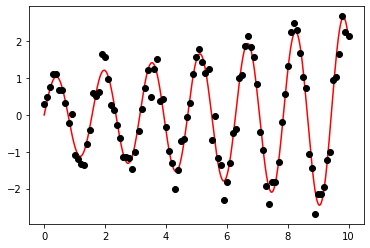

In [ ]:
yplot = np.exp(a * xplot) * np.sin(b * xplot)
plt.plot(xplot, yplot, 'r', x, y, 'ko')

As you can see, this is a substantially better match than any of our polynomials.  There is one important word of warning worth including here: The function $E(a, b)$ is highly nonlinear, and so it is entirely possible that it has more than one minimum.  `minimize` has no guarantee of finding the best fit; it will just find a local minimum close to your initial guess.  This means that if you make a bad initial guess for the coefficients, then you can find a very bad fit for your data.  For example, 

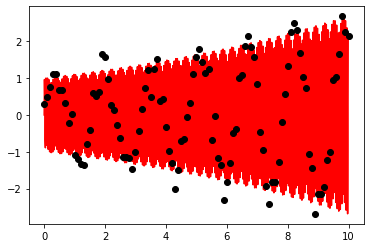

In [ ]:
coeff_min = scipy.optimize.minimize(RMS_Error, np.array([0.1, 10]), method='Nelder-Mead')
a = coeff_min.x[0]
b = coeff_min.x[1]
yplot = np.exp(a * xplot) * np.sin(b * xplot)
plt.plot(xplot, yplot, 'r', x, y, 'ko')

There is no systematic way around this issue; you just have to know enough about where your data came from to make a reasonable guess.  